In [1]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import sklearn.metrics as smetrics

import matplotlib.pyplot as plt

import utilities.data_utils as util
import utilities.ML_utilils as ml
import utilities.ryan_utils as rutils

/Users/ryan/Documents/northeastern_MSCS/CS6120/salary_prediction_final_project/utilities/data_utils.py:57: SyntaxWarning: invalid escape sequence '\S'
  desc = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','', desc)
[nltk_data] Downloading package stopwords to /Users/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pre-processing of data

In [2]:
# importing data for SVR
df = pd.read_csv('data/downsampled_df.csv')
X_col = df['description'].tolist()
y_col = df['annual_salary'].tolist()

In [3]:
# reduce sample size due to quickly increasing training times (2 min for 1000 samples, 12 min for 2000 samples)
SAMPLES = 2000 
# Applying some text pre-processing
X_processed = util.pre_process_descriptions(X_col)
X_bow_featurized = ml.featurize_bow(X_processed[0:SAMPLES]).toarray()
X_tfidf_featurized = ml.featurize_tfIDF(X_processed[0:SAMPLES], .25, 1).toarray()

y_featurized = y_col[0:SAMPLES]

In [4]:
# splitting the data for input into our model
TEST_SIZE = .2
X_BOW_train, X_BOW_test, y_train, y_test = train_test_split(X_bow_featurized, y_featurized, test_size=TEST_SIZE, random_state=42)
X_TFIDF_train, X_TFIDF_test, y_train, y_test = train_test_split(X_tfidf_featurized, y_featurized, test_size=TEST_SIZE, random_state=42)

In [5]:
#play around with C and Epsilon here - these are the hyperparameters to our model
C_VALUES = [1, 10, 100, 250, 500, 750, 1000, 2000, 3000, 4000]

## Train the models

In [6]:
# All of these models take ~40+ minutes to train
linear_BOW_model, linear_BOW_preds = rutils.train_and_predict_SVR('linear', X_BOW_train, y_train, X_BOW_test, C_VALUES)
poly_BOW_model, poly_BOW_preds = rutils.train_and_predict_SVR('poly', X_BOW_train, y_train, X_BOW_test, C_VALUES)
rbf_BOW_model, rbf_BOW_preds = rutils.train_and_predict_SVR('rbf', X_BOW_train, y_train, X_BOW_test, C_VALUES)

linear_TFIDF_model, linear_TFIDF_preds = rutils.train_and_predict_SVR('linear', X_TFIDF_train, y_train, X_TFIDF_test, C_VALUES)
poly_TFIDF_model, poly_TFIDF_preds = rutils.train_and_predict_SVR('poly', X_TFIDF_train, y_train, X_TFIDF_test, C_VALUES)
rbf_TFIDF_model, rbf_TFIDF_preds = rutils.train_and_predict_SVR('rbf', X_TFIDF_train, y_train, X_TFIDF_test, C_VALUES)

## Below this point, the code relates to graphing model performance

In [7]:
def graph_performance_by_error(title, all_preds, y_actual, C_values):
    mae = util.get_evaluation_metric(smetrics.mean_absolute_error, all_preds, y_actual)
    plt.xlabel("SVR C-parameter Value")
    plt.ylabel("Mean Average Error in Dollars")
    plt.plot(C_values, mae,  "-bo")
    plt.title(title)

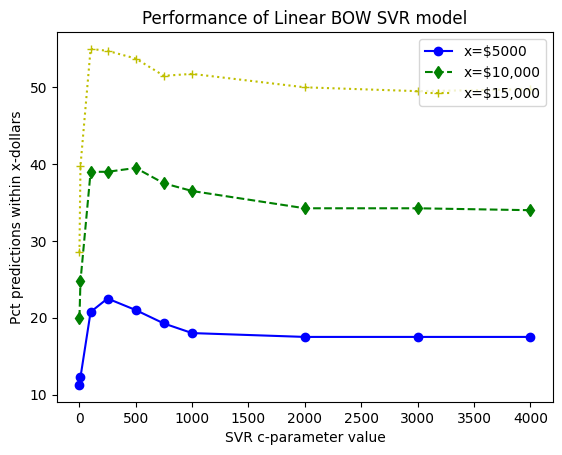

In [8]:
TITLE_PREFIX = 'Performance of '
model_name = 'Linear BOW SVR model'
title = TITLE_PREFIX+model_name
rutils.graph_SVR_performance_by_accuracy(title, linear_BOW_preds, y_test, C_VALUES)

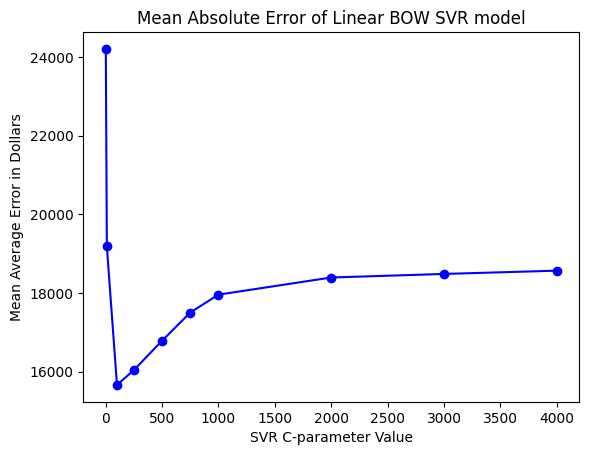

In [9]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, linear_BOW_preds, y_test, C_VALUES)

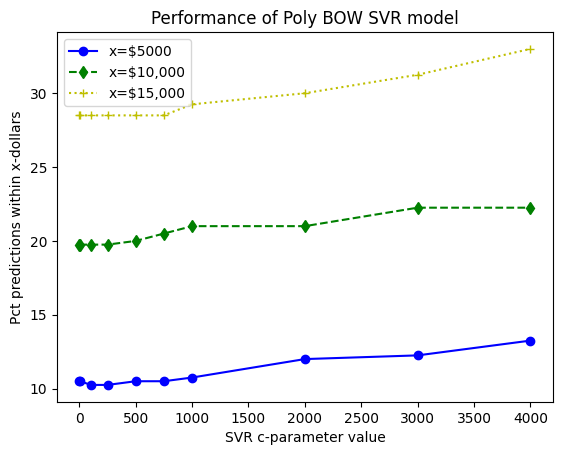

In [10]:
TITLE_PREFIX = 'Performance of '
model_name = 'Poly BOW SVR model'
rutils.graph_SVR_performance_by_accuracy(TITLE_PREFIX+model_name, poly_BOW_preds, y_test, C_VALUES)

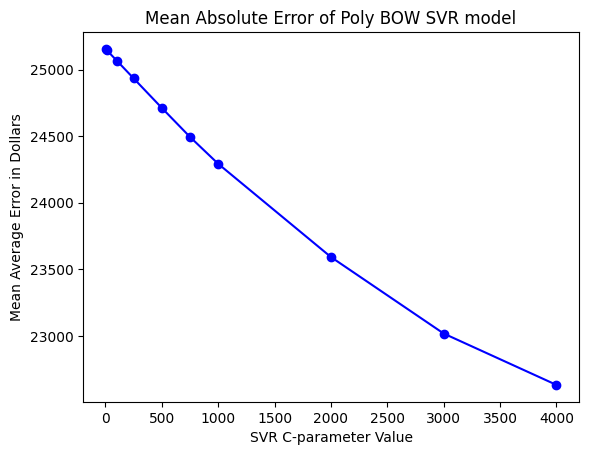

In [11]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, poly_BOW_preds, y_test, C_VALUES)

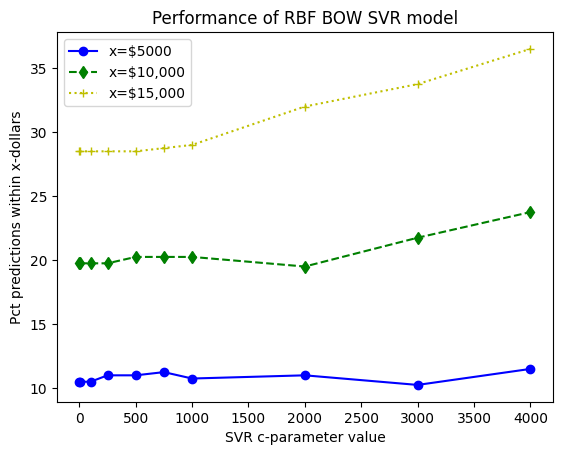

In [12]:
TITLE_PREFIX = 'Performance of '
model_name = 'RBF BOW SVR model'
rutils.graph_SVR_performance_by_accuracy(TITLE_PREFIX+model_name, rbf_BOW_preds, y_test, C_VALUES)

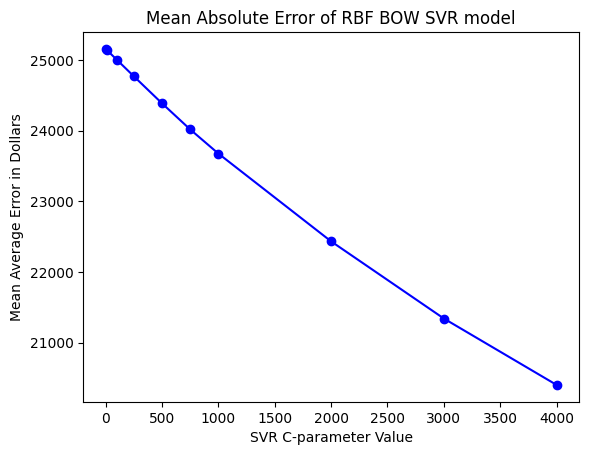

In [13]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, rbf_BOW_preds, y_test, C_VALUES)

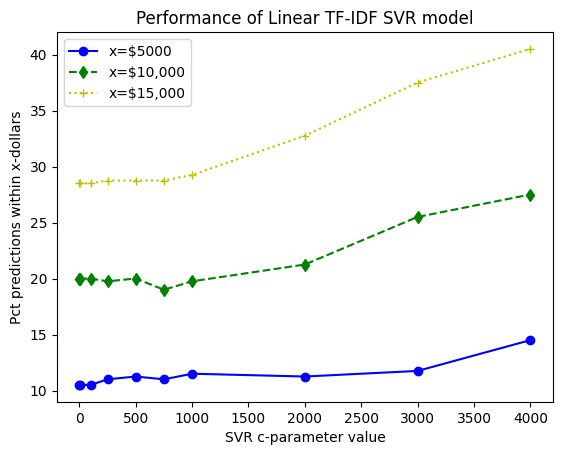

In [14]:
TITLE_PREFIX = 'Performance of '
model_name = 'Linear TF-IDF SVR model'
rutils.graph_SVR_performance_by_accuracy(TITLE_PREFIX+model_name, linear_TFIDF_preds, y_test, C_VALUES)

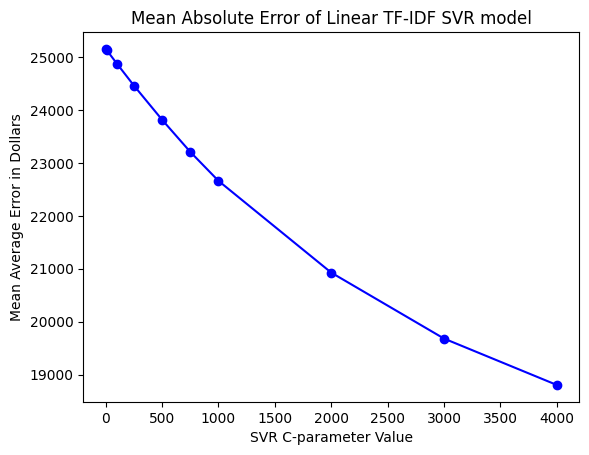

In [15]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, linear_TFIDF_preds, y_test, C_VALUES)

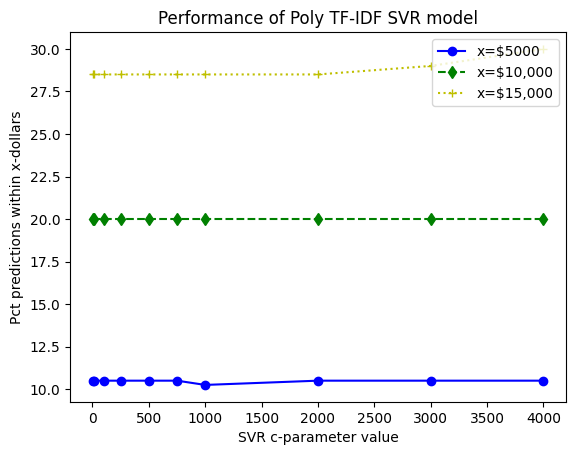

In [16]:
TITLE_PREFIX = 'Performance of '
model_name = 'Poly TF-IDF SVR model'
rutils.graph_SVR_performance_by_accuracy(TITLE_PREFIX+model_name, poly_TFIDF_preds, y_test, C_VALUES)

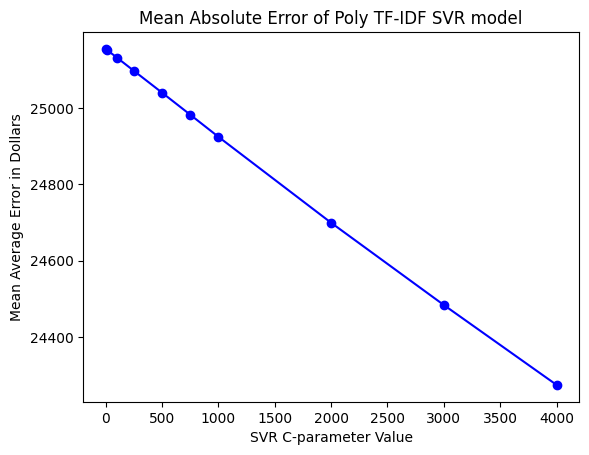

In [17]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, poly_TFIDF_preds, y_test, C_VALUES)

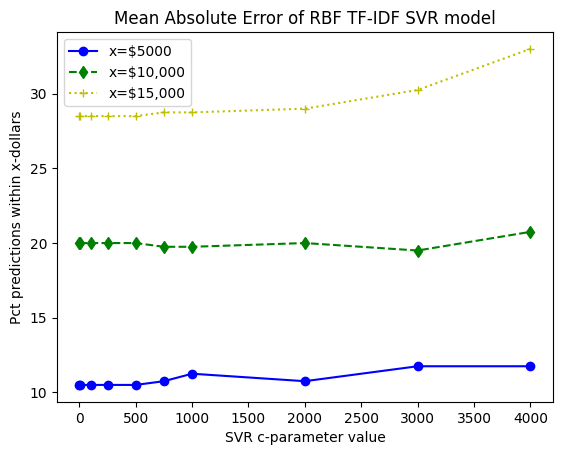

In [18]:
model_name = 'RBF TF-IDF SVR model'
rutils.graph_SVR_performance_by_accuracy(TITLE_PREFIX+model_name, rbf_TFIDF_preds, y_test, C_VALUES)

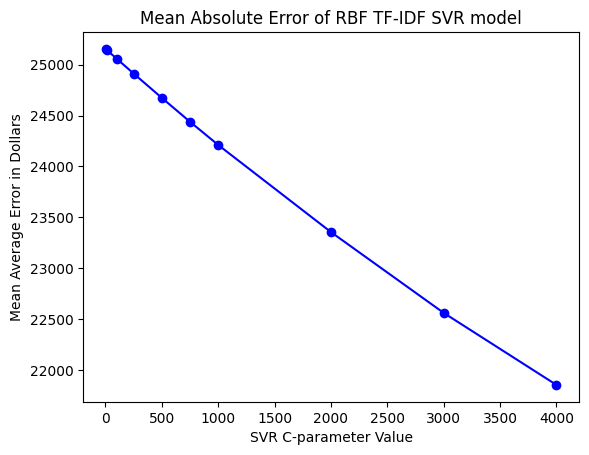

In [19]:
TITLE_PREFIX = 'Mean Absolute Error of '
graph_performance_by_error(TITLE_PREFIX+model_name, rbf_TFIDF_preds, y_test, C_VALUES)

[118000.0, 42000.0, 100000.0, 52500.0, 90000.0, 85000.0, 52000.0, 125000.0, 34000.0, 77087.5, 39560.0, 76000.0, 84922.5, 54000.0, 46810.0, 44718.0, 61500.0, 39460.0, 103000.0, 125000.0, 53700.0, 105000.0, 125000.0, 80000.0, 105000.0, 38000.0, 79656.5, 75000.0, 60000.0, 45000.0, 50400.0, 74690.0, 54000.0, 56250.0, 96000.0, 42000.0, 125000.0, 95000.0, 85061.5, 44000.0, 44000.0, 125000.0, 30000.0, 55300.0, 117500.0, 53000.0, 55000.0, 60000.0, 40000.0, 106050.0, 107210.0, 50000.0, 85000.0, 48000.0, 74000.0, 125000.0, 96552.975, 110000.0, 100000.0, 49500.0, 89500.0, 53000.0, 115000.0, 83000.0, 103010.0, 105000.0, 75000.0, 120000.0, 43000.0, 78000.0, 80000.0, 47000.0, 77500.0, 89000.0, 67500.0, 50000.0, 105000.0, 70000.0, 38000.0, 105000.0, 49400.0, 65000.0, 82500.0, 110000.0, 113600.0, 83500.0, 103000.0, 38160.0, 41600.0, 102500.0, 102000.0, 119500.0, 44629.99999999999, 29070.0, 115000.0, 102500.0, 54000.0, 85000.0, 119200.0, 120000.0, 75000.0, 75000.0, 40400.0, 80000.0, 38000.0, 65160.0, 5

/Users/ryan/Documents/northeastern_MSCS/CS6120/salary_prediction_final_project/utilities/data_utils.py:201: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_counts = data.groupby('Absolute Difference Bucket').size().reset_index(name='Count')


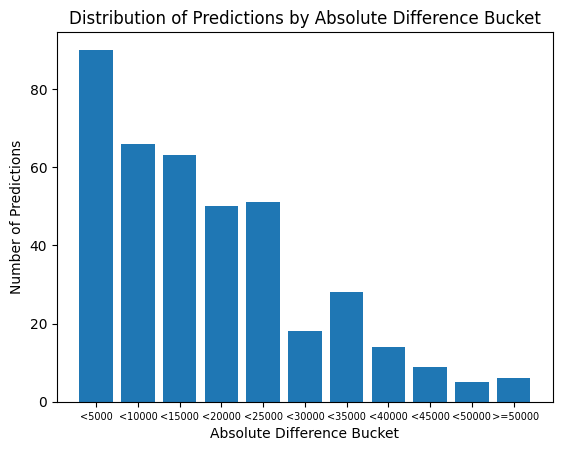

In [20]:
# Take predictions made from SVR model made with the 4th C-value (500), since that seems to yield the
# best results for the best model
best_model_predictions = linear_BOW_preds[3]
# print(best_model_predictions)
print(y_test)
util.plot_accuracy_in_buckets(y_test, best_model_predictions)